# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lintang Iqhtiar Dwi Mawarni
- **Email:** lintangiqhtiar@gmail.com
- **ID Dicoding:** lintanggg

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda baik perhari maupun perjam?
- Bagaimana kita dapat memprediksi jumlah penyewaan sepeda pada hari dan jam tertentu berdasarkan kondisi cuaca  dan musim?

- Bagaimana variabel lingkungan seperti suhu, kelembaban, dan kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('/content/drive/MyDrive/Data Analyst/Dicoding/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv('/content/drive/MyDrive/Data Analyst/Dicoding/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


jika diperhatikan dengan seksama, pada df_day tidak ada missing value namun terdapat kesalahan tipe data
pada dteday menjadi date
terdapat beberapa kolom yang berisi data ordinal seperti season,

In [5]:
print('jumlah nilai duplikat: ',df_day.duplicated().sum())

jumlah nilai duplikat:  0


In [6]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("jumlah nilai duplikat:",df_hour.duplicated().sum())

jumlah nilai duplikat: 0


In [9]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [10]:
#mengubah tipe data dteday pada df_day
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
#merubah value kolom season menjadi nama musim sesuai dengan dokumnetasi
cleaned_df_day = df_day.copy()
season_dict = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

cleaned_df_day['season'] = df_day['season'].map(season_dict)
cleaned_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
#merubah nama
weekday_dict = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
cleaned_df_day['weekday']= df_day['weekday'].map(weekday_dict)
cleaned_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
#merubah nama bulan
month_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

cleaned_df_day['mnth'] = df_day['mnth'].map(month_dict)
cleaned_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
#mengembalikan nilai yang telah dinormalisasi pada kolom temp dengan di kali 41
cleaned_df_day['temp_in _celcius'] = df_day['temp'] * 41
cleaned_df_day.head()

#value pada kolom temp diubah menjad 2 angka di belakang koma
cleaned_df_day['temp_in _celcius'] = cleaned_df_day['temp_in _celcius'].round(2)
cleaned_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in _celcius
0,1,2011-01-01,spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.11
1,2,2011-01-02,spring,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.90
2,3,2011-01-03,spring,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.05
3,4,2011-01-04,spring,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.20
4,5,2011-01-05,spring,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.31


In [15]:
#mengembalikan nilai yang telah dinormalisasi pada kolom atemp dengan di kali 50
cleaned_df_day['atemp_in _celcius'] = df_day['atemp'] * 50
cleaned_df_day.head

#nilai pada kolom atemp diubah menjadi 2 angka dibelakang koma
cleaned_df_day['atemp_in _celcius'] = cleaned_df_day['atemp_in _celcius'].round(2)
cleaned_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in _celcius,atemp_in _celcius
0,1,2011-01-01,spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.11,18.18
1,2,2011-01-02,spring,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.90,17.69
2,3,2011-01-03,spring,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.05,9.47
3,4,2011-01-04,spring,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.20,10.61
4,5,2011-01-05,spring,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.31,11.46


In [16]:
#mengembalikan nilai yang telah dinormalisasikan pada kolom hum dengan dikali 100
cleaned_df_day['humidity'] = df_day['hum'] * 100
cleaned_df_day

#nilai pada kolom humadity diubah mnejadi 2 angka dibelakang koma
cleaned_df_day['humidity'] = cleaned_df_day['humidity'].round(2)
cleaned_df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in _celcius,atemp_in _celcius,humidity
0,1,2011-01-01,spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.11,18.18,80.58
1,2,2011-01-02,spring,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.90,17.69,69.61
2,3,2011-01-03,spring,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.05,9.47,43.73
3,4,2011-01-04,spring,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.20,10.61,59.04
4,5,2011-01-05,spring,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.31,11.46,43.70


In [17]:
#mengembalikan nilai windspeed yang telah dinormalisasikan dengan dikali 67
cleaned_df_day['windspeed_value'] = df_day['windspeed'] * 67
cleaned_df_day

#merubah nilai pada kolom windspeed_value menjadi 2 angka dibelakang koma
cleaned_df_day['windspeed_value'] = cleaned_df_day['windspeed_value'].round(2)
cleaned_df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in _celcius,atemp_in _celcius,humidity,windspeed_value
0,1,2011-01-01,spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.11,18.18,80.58,10.75
1,2,2011-01-02,spring,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.90,17.69,69.61,16.65
2,3,2011-01-03,spring,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.05,9.47,43.73,16.64
3,4,2011-01-04,spring,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.20,10.61,59.04,10.74
4,5,2011-01-05,spring,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.31,11.46,43.70,12.52


In [18]:
#mengubah tipe data dteday menjadi date pada df_hour
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
cleaned_df_hour = df_hour.copy()
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
#mengembalikan nilai temp yang telah dinormalisasikan dengan dikali 41 dan merubahnya menjadi 2 angka di belakang koma
cleaned_df_hour['temp_in_celcius'] = df_hour['temp'] * 41
cleaned_df_hour['temp_in_celcius'] = cleaned_df_hour['temp_in_celcius'].round(2)
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84


In [21]:
#mengembalikan nilai atemp yang telah dinormalisasikan dengan dikali 50 dan merubahnya menjadi 2 angka di belakang koma
cleaned_df_hour['atemp_in_celcius'] = df_hour['atemp'] * 50
cleaned_df_hour['atemp_in_celcius'] = cleaned_df_hour['atemp_in_celcius'].round(2)
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.40
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.64
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.64
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.40
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.40


In [22]:
#mengembalikan nilai hum yang telah dinormalisasikan dengan dikali 100 dan merubahnya menjadi 2 angka di belakang koma
cleaned_df_hour['humidity'] = df_hour['hum'] * 100
cleaned_df_hour['humidity'] = cleaned_df_hour['humidity'].round(2)
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius,humidity
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,9.84,14.40,81.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,9.02,13.64,80.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,9.02,13.64,80.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,9.84,14.40,75.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,9.84,14.40,75.0


In [23]:
#mengembalikan nilai windspeed yang telah dinormalisasikan dengan dikali 67 dan merubahnya menjadi 2 angka di belakang koma
cleaned_df_hour['windspeed_value'] = df_hour['windspeed'] * 67
cleaned_df_hour['windspeed_value'] = cleaned_df_hour['windspeed_value'].round(2)
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius,humidity,windspeed_value
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,9.84,14.40,81.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,9.02,13.64,80.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,9.02,13.64,80.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,9.84,14.40,75.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,9.84,14.40,75.0,0.0


In [24]:
#mengubah nilai pada kolom season sesuai nama seasonnya
season_dict = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

cleaned_df_hour['season'] = df_hour['season'].map(season_dict)
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius,humidity,windspeed_value
0,1,2011-01-01,spring,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,9.84,14.40,81.0,0.0
1,2,2011-01-01,spring,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,9.02,13.64,80.0,0.0
2,3,2011-01-01,spring,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,9.02,13.64,80.0,0.0
3,4,2011-01-01,spring,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,9.84,14.40,75.0,0.0
4,5,2011-01-01,spring,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,9.84,14.40,75.0,0.0


In [25]:
cleaned_df_hour['weathersit'].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


In [26]:
cleaned_df_hour_to_drop = cleaned_df_hour[cleaned_df_hour['weathersit'] == 4]
cleaned_df_hour_to_drop.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius,humidity,windspeed_value
585,586,2011-01-26,spring,0,1,16,0,3,1,4,...,0.1970,0.93,0.3284,1,35,36,9.02,9.85,93.0,22.0
8854,8855,2012-01-09,spring,1,1,18,0,1,1,4,...,0.2273,0.86,0.0896,6,158,164,8.20,11.36,86.0,6.0
9123,9124,2012-01-21,spring,1,1,1,0,6,0,4,...,0.1364,0.86,0.1940,1,22,23,5.74,6.82,86.0,13.0


In [27]:
cleaned_df_hour = cleaned_df_hour.drop(cleaned_df_hour_to_drop.index)
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius,humidity,windspeed_value
0,1,2011-01-01,spring,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,9.84,14.40,81.0,0.0
1,2,2011-01-01,spring,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,9.02,13.64,80.0,0.0
2,3,2011-01-01,spring,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,9.02,13.64,80.0,0.0
3,4,2011-01-01,spring,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,9.84,14.40,75.0,0.0
4,5,2011-01-01,spring,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,9.84,14.40,75.0,0.0


## Exploratory Data Analysis (EDA)

### Explore cleaned_df_day

In [28]:
cleaned_df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_in _celcius,atemp_in _celcius,humidity,windspeed_value
0,1,2011-01-01,spring,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.11,18.18,80.58,10.75
1,2,2011-01-02,spring,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.90,17.69,69.61,16.65
2,3,2011-01-03,spring,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.05,9.47,43.73,16.64
3,4,2011-01-04,spring,0,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.20,10.61,59.04,10.74
4,5,2011-01-05,spring,0,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.31,11.46,43.70,12.52


In [29]:
#membuat pivot tabel untuk menunjukan performa penyewaan
cleaned_df_day.groupby('season')[['casual', 'registered', 'cnt']].sum().sort_values('cnt', ascending=False)

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
spring,60622,410726,471348


In [30]:
#membuat pivot tabeh dengan performa penyewaan perharinya
cleaned_df_day.groupby('weekday')[['casual', 'registered', 'cnt']].sum().sort_values('cnt', ascending=False)

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [31]:
#pivot tabel untuk mengetahui performa penyewaan sepeda tiap harinya
cleaned_df_day.groupby('workingday')[['casual', 'registered', 'cnt']].sum().sort_values('cnt', ascending=False)

,casual,registered,cnt
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


In [32]:
#pivot tabel untuk melihat tingkat persewaann ketika ada kegiatan di kota
cleaned_df_day.groupby('holiday')[['casual', 'registered', 'cnt']].sum().sort_values('cnt', ascending=False)

,casual,registered,cnt
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [33]:
#performa penyewaan per hari
cleaned_df_day.groupby('dteday')[['casual', 'registered', 'cnt']].sum().sort_values('dteday', ascending=False)

,casual,registered,cnt
dteday,,,
2012-12-31,439,2290,2729
2012-12-30,364,1432,1796
2012-12-29,159,1182,1341
2012-12-28,644,2451,3095
2012-12-27,247,1867,2114
...,...,...,...
2011-01-05,82,1518,1600
2011-01-04,108,1454,1562
2011-01-03,120,1229,1349


In [34]:
#Pengaruh variabel lingkungan terhadap penyewaan sepeda per hari
cleaned_df_day.groupby('dteday')[['temp_in _celcius', 'atemp_in _celcius', 'humidity', 'windspeed_value']].mean().sort_values('dteday', ascending=False)
cleaned_df_day.groupby('dteday').agg({
    'temp_in _celcius': 'mean',
    'atemp_in _celcius': 'mean',
    'humidity': 'mean',
    'windspeed_value': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values('dteday', ascending=False)

,temp_in _celcius,atemp_in _celcius,humidity,windspeed_value,casual,registered,cnt
dteday,,,,,,,
2012-12-31,8.85,11.17,57.75,10.37,439,2290,2729
2012-12-30,10.49,11.58,48.33,23.50,364,1432,1796
2012-12-29,10.39,12.12,75.29,8.33,159,1182,1341
2012-12-28,10.39,12.75,59.00,10.42,644,2451,3095
2012-12-27,10.42,11.33,65.29,23.46,247,1867,2114
...,...,...,...,...,...,...,...
2011-01-05,9.31,11.46,43.70,12.52,82,1518,1600
2011-01-04,8.20,10.61,59.04,10.74,108,1454,1562
2011-01-03,8.05,9.47,43.73,16.64,120,1229,1349


##Explore pada cleaned_df_hour

In [35]:
cleaned_df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_in_celcius,atemp_in_celcius,humidity,windspeed_value
0,1,2011-01-01,spring,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,9.84,14.40,81.0,0.0
1,2,2011-01-01,spring,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,9.02,13.64,80.0,0.0
2,3,2011-01-01,spring,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,9.02,13.64,80.0,0.0
3,4,2011-01-01,spring,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,9.84,14.40,75.0,0.0
4,5,2011-01-01,spring,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,9.84,14.40,75.0,0.0


In [36]:
#melihat performa per jam berdasarkan musim
cleaned_df_hour.groupby('season')[['casual', 'registered', 'cnt']].sum().sort_values('cnt', ascending=False)

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
spring,60614,410511,471125


In [37]:
cleaned_df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17376 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17376 non-null  int64         
 1   dteday            17376 non-null  datetime64[ns]
 2   season            17376 non-null  object        
 3   yr                17376 non-null  int64         
 4   mnth              17376 non-null  int64         
 5   hr                17376 non-null  int64         
 6   holiday           17376 non-null  int64         
 7   weekday           17376 non-null  int64         
 8   workingday        17376 non-null  int64         
 9   weathersit        17376 non-null  int64         
 10  temp              17376 non-null  float64       
 11  atemp             17376 non-null  float64       
 12  hum               17376 non-null  float64       
 13  windspeed         17376 non-null  float64       
 14  casual            17376 non

In [38]:
#pivot tabel untuk melihat performa penyewaan perjam
cleaned_df_hour.groupby('hr')[['casual', 'registered', 'cnt']].sum().sort_values('hr', ascending=True)

,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4708,19433,24141
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171
8,15761,245240,261001


In [39]:
#pivot tabel untuk melihat performa penyewaan perjam saat dipengaruhi lingkuangan
cleaned_df_hour.groupby('hr').agg({
    'temp_in_celcius': 'mean',
    'atemp_in_celcius': 'mean',
    'humidity': 'mean',
    'windspeed_value': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values('hr', ascending=True)

,temp_in_celcius,atemp_in_celcius,humidity,windspeed_value,casual,registered,cnt
hr,,,,,,,
0,19.163829,22.555069,69.101928,10.837466,7375,31755,39130
1,18.852061,22.185353,70.399723,10.626556,4708,19433,24141
2,18.637510,21.958951,71.682517,10.352448,3412,12940,16352
3,18.577647,21.919397,72.978479,10.111908,1893,6281,8174
4,18.311765,21.627274,74.236729,10.439024,874,3554,4428
5,17.881032,21.156904,74.292887,10.072524,1012,13249,14261
6,17.731228,20.968593,74.417931,10.566897,3017,52115,55132
7,18.002779,21.277428,73.090784,10.982118,8037,146134,154171
8,18.654718,22.013287,70.268226,11.829436,15761,245240,261001


## Visualization & Explanatory Analysis

Text(0, 0.5, 'Rental Amount')

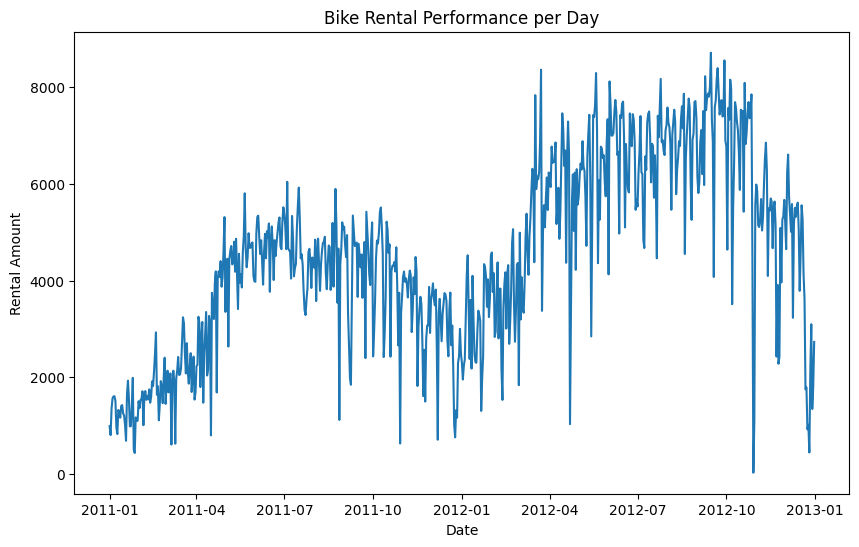

In [40]:
performance = cleaned_df_day.groupby('dteday')['cnt'].sum()
performance

plt.figure(figsize=(10, 6))
plt.plot(performance.index, performance.values)
plt.title('Bike Rental Performance per Day')
plt.xlabel('Date')
plt.ylabel('Rental Amount')

### Pertanyaan 1: Bagaimana performa penyewaan sepeda baik perhari maupun perjam?

<function matplotlib.pyplot.show(close=None, block=None)>

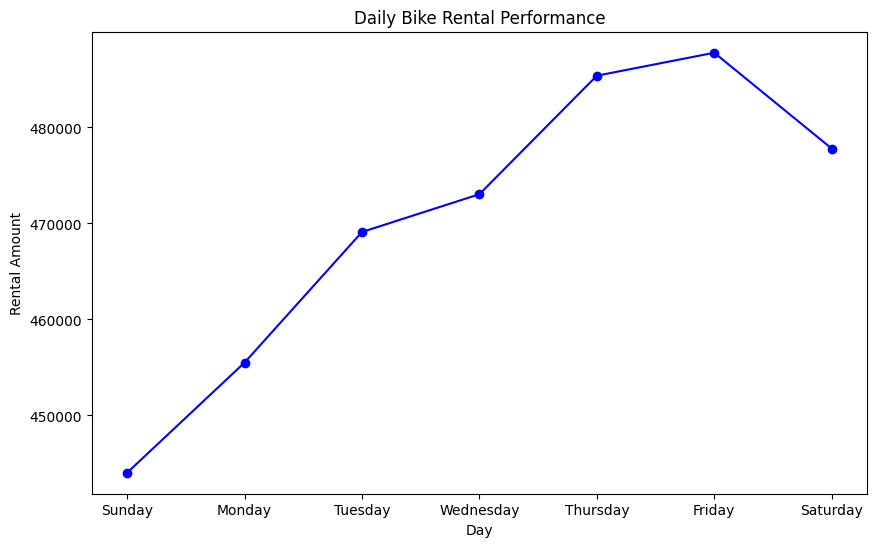

In [41]:
#membuat tabel performa dan mengurutkan sesai nama hari
performace_table_day = cleaned_df_day.groupby('weekday')[['casual', 'registered', 'cnt']].sum()
performace_table_day = performace_table_day.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
performace_table_day

plt.figure(figsize=(10, 6))
plt.plot(performace_table_day.index, performace_table_day['cnt'], marker='o', label='Total', color='blue')
plt.title('Daily Bike Rental Performance')
plt.xlabel('Day')
plt.ylabel('Rental Amount')
plt.show

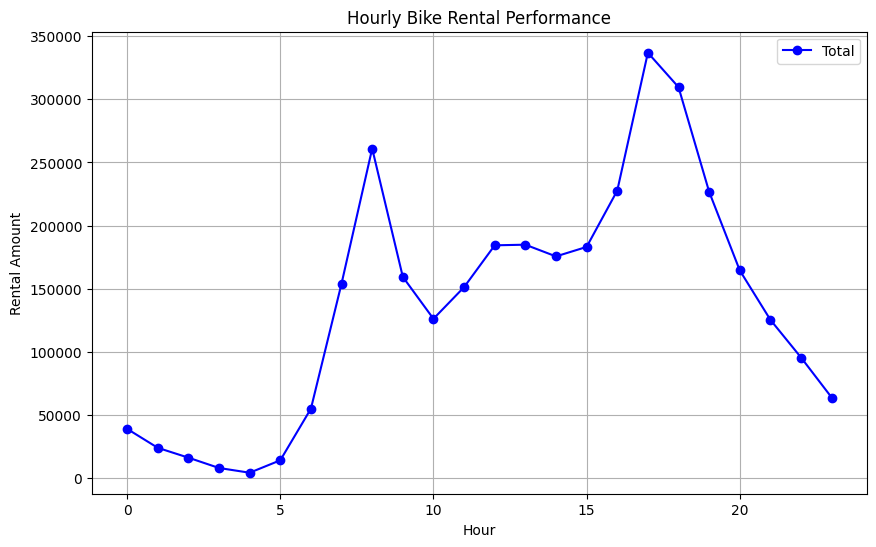

In [42]:
# Membuat tabel performa dan mengurutkan sesuai jam dari 0 - 23
performance_table_hour = cleaned_df_hour.groupby('hr')[['casual', 'registered', 'cnt']].sum()
performance_table_hour = performance_table_hour.sort_index()
performance_table_hour

# Membuat diagram garis berdasarkan hr
plt.figure(figsize=(10, 6))
plt.plot(performance_table_hour.index, performance_table_hour['cnt'], marker='o', label='Total', color='blue')
plt.title('Hourly Bike Rental Performance')
plt.xlabel('Hour')
plt.ylabel('Rental Amount')
plt.grid(True)  # Menambahkan grid untuk mempermudah pembacaan grafik
plt.legend()  # Menampilkan legenda jika ada lebih dari satu plot
plt.show()


### Pertanyaan 2: Bagaimana kita dapat memprediksi jumlah penyewaan sepeda pada hari dan jam tertentu berdasarkan kondisi cuaca  dan musim?

<function matplotlib.pyplot.show(close=None, block=None)>

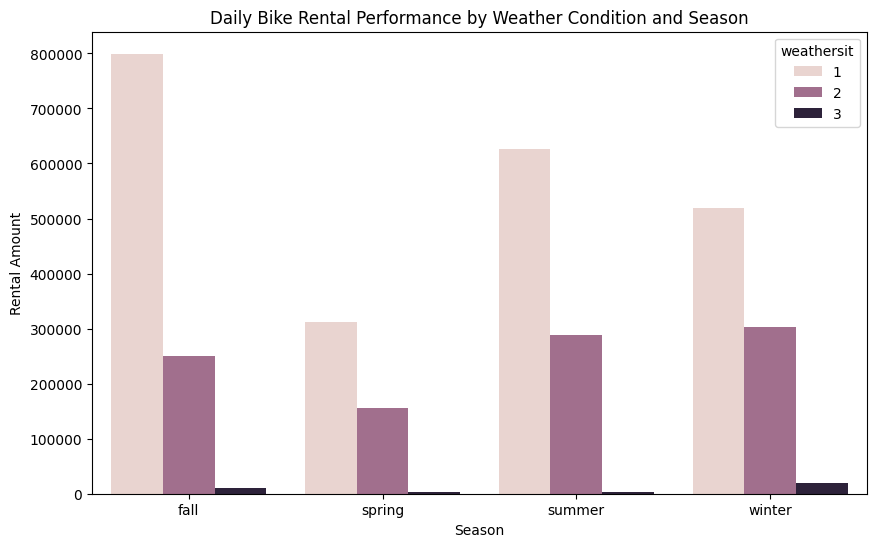

In [43]:
#jemlah penyewaan per hari berdasarkan kondisi cuaca dan musim
data = cleaned_df_day.groupby(['season', 'weathersit'])[['casual', 'registered', 'cnt']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=data)
plt.title('Daily Bike Rental Performance by Weather Condition and Season')
plt.xlabel('Season')
plt.ylabel('Rental Amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

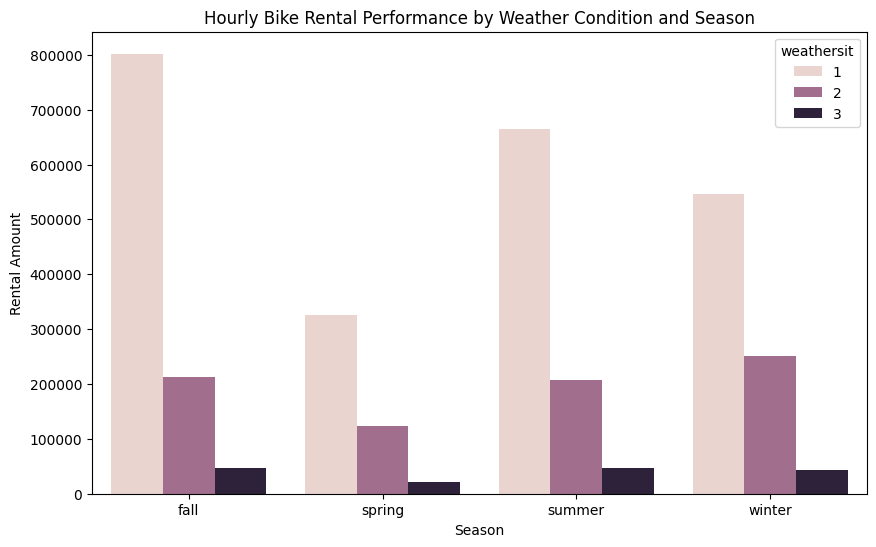

In [44]:
#jemlah penyewaan per jam berdasarkan kondisi cuaca dan musim
data1 = cleaned_df_hour.groupby(['season', 'weathersit'])[['casual', 'registered', 'cnt']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='weathersit', data=data1)
plt.title('Hourly Bike Rental Performance by Weather Condition and Season')
plt.xlabel('Season')
plt.ylabel('Rental Amount')
plt.show

###Pertanyaan ke-3:Bagaimana variabel lingkungan seperti suhu, kelembaban, dan kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

<function matplotlib.pyplot.show(close=None, block=None)>

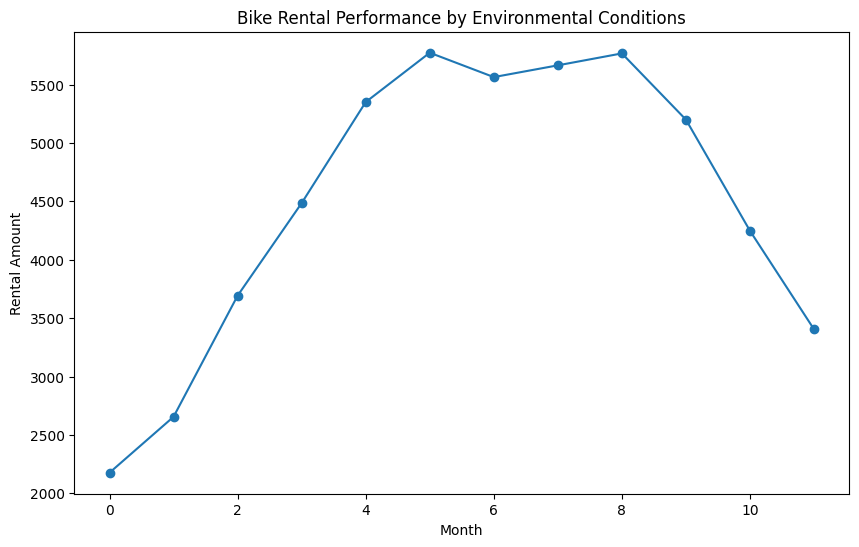

In [45]:
#jumlah penyewaan sepeda berdasarkan pengaruh variabel lingkungan
performance_by_condition = cleaned_df_day.groupby('dteday').agg({
    'temp_in _celcius': 'mean',
    'atemp_in _celcius': 'mean',
    'humidity': 'mean',
    'windspeed_value': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values('dteday', ascending=False)

#reset index menjadi per bulan
performance_by_condition = performance_by_condition.reset_index()
performance_by_condition['dteday'] = pd.to_datetime(performance_by_condition['dteday'])
performance_by_condition['month'] = performance_by_condition['dteday'].dt.month
performance_by_condition = performance_by_condition.groupby('month').mean()
performance_by_condition = performance_by_condition.reset_index()
performance_by_condition

#buat grafik
plt.figure(figsize=(10, 6))
plt.plot(performance_by_condition.index, performance_by_condition['cnt'], marker='o', label='Total')

plt.title('Bike Rental Performance by Environmental Conditions')
plt.xlabel('Month')
plt.ylabel('Rental Amount')
plt.show

In [46]:
performance_by_condition

,month,dteday,temp_in _celcius,atemp_in _celcius,humidity,windspeed_value,casual,registered,cnt
0,1,2011-07-17 12:00:00.000000000,9.694032,11.989355,58.582742,13.822419,194.225806,1982.112903,2176.338710
1,2,2011-08-19 10:56:50.526315776,12.268596,14.987018,56.745965,14.451228,262.508772,2392.789474,2655.298246
2,3,2011-09-15 00:00:00.000000000,16.011935,19.097903,58.847581,14.921290,716.838710,2975.419355,3692.258065
3,4,2011-10-15 12:00:00.000000000,19.269667,22.853833,58.806167,15.710167,1013.366667,3471.533333,4484.900000
4,5,2011-11-15 00:00:00.000000000,24.386935,28.283548,68.896129,12.260161,1214.274194,4135.500000,5349.774194
5,6,2011-12-15 12:00:00.000000000,28.047833,31.912500,57.580333,12.423167,1231.766667,4540.600000,5772.366667
6,7,2012-01-15 00:00:00.000000000,30.974355,35.204355,59.787258,11.125968,1260.596774,4303.080645,5563.677419
7,8,2012-02-15 00:00:00.000000000,29.051613,32.573387,63.772903,11.585968,1161.919355,4502.500000,5664.419355
8,9,2012-03-16 12:00:00.000000000,25.277000,28.964833,71.471833,11.117833,1172.050000,4594.466667,5766.516667
9,10,2012-04-16 00:00:00.000000000,19.885645,23.599355,69.376129,11.738710,963.870968,4235.354839,5199.225806


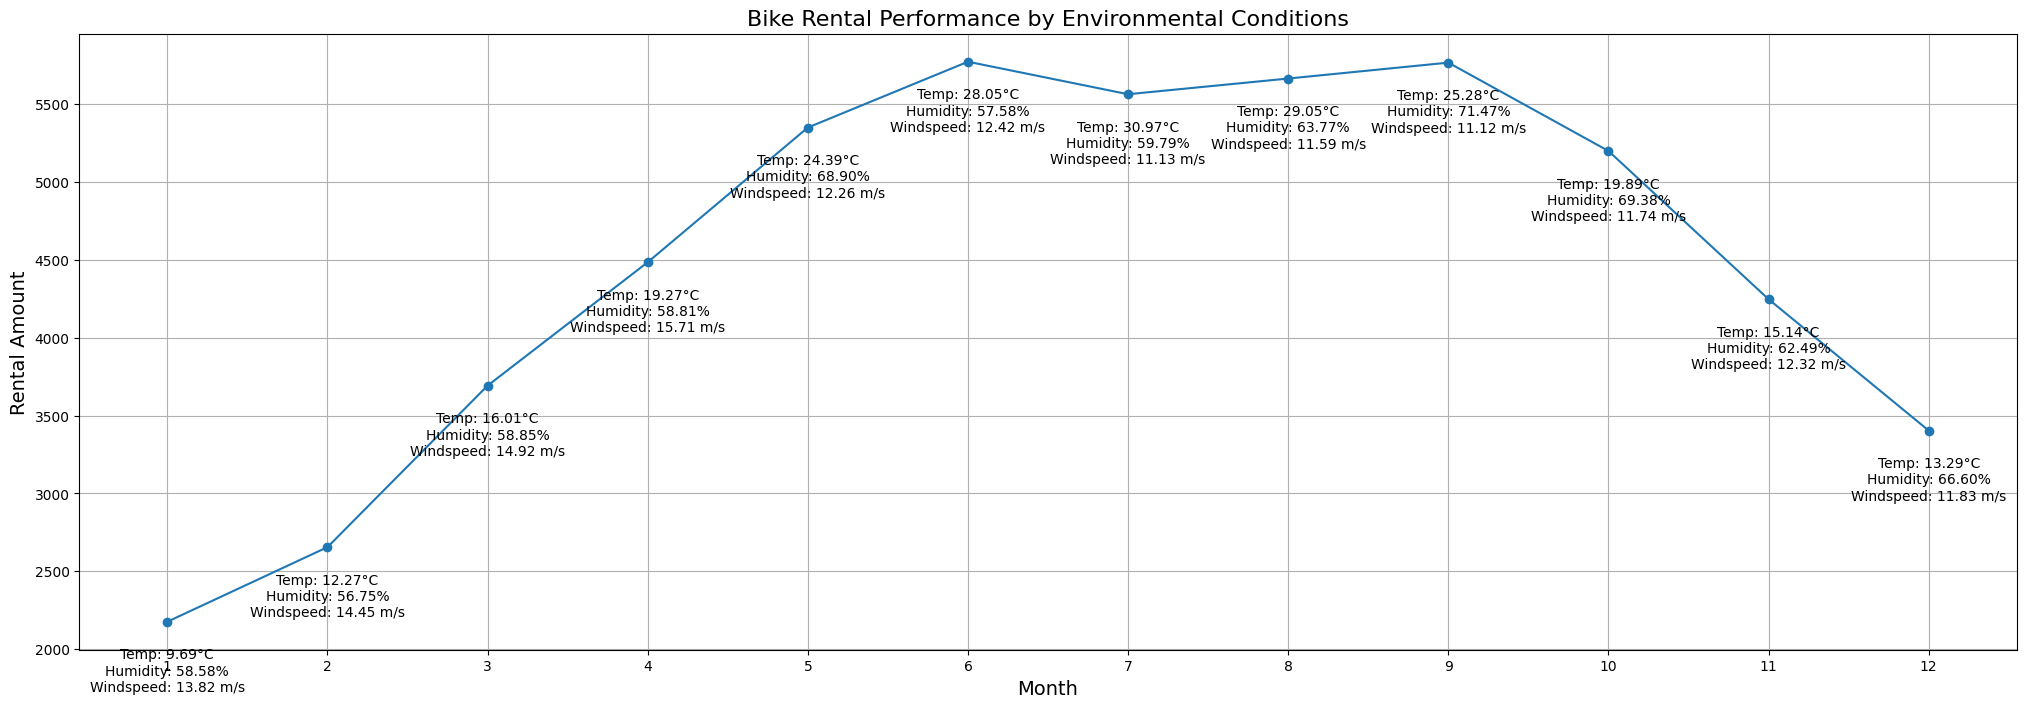

In [67]:
# Buat grafik
plt.figure(figsize=(25, 8))
plt.plot(performance_by_condition['month'], performance_by_condition['cnt'], marker='o', label='Total Rentals', color='#1f77b4')

# Anotasi tiap titik dengan rata-rata suhu, kelembapan, dan kecepatan angin
for i in range(len(performance_by_condition)):
    label = (f"Temp: {performance_by_condition['temp_in _celcius'][i]:.2f}°C\n"
             f"Humidity: {performance_by_condition['humidity'][i]:.2f}%\n"
             f"Windspeed: {performance_by_condition['windspeed_value'][i]:.2f} m/s")
    plt.annotate(label,
                 (performance_by_condition['month'][i], performance_by_condition['cnt'][i]),
                 textcoords="offset points",
                 xytext=(0,-50),
                 ha='center')

plt.title('Bike Rental Performance by Environmental Conditions', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Rental Amount', fontsize=14)
plt.xticks(performance_by_condition['month'])
plt.grid(True)
plt.show()


## Conclusion

###Pertanyaan ke-1 : Bagaimana performa penyewaan sepeda baik perhari maupun perjam?



**Insight:**

Berdasarkan grafik performa penyewaan harian, terlihat bahwa pada hari kerja, jumlah penyewaan sepeda mengalami peningkatan yang signifikan. Namun, ketika memasuki akhir pekan (Sabtu - Minggu), terjadi penurunan drastis dalam jumlah penyewaan.

Untuk performa penyewaan per jam, terlihat pola yang beragam, dengan peningkatan signifikan selama jam masuk kerja (pukul 06:00 - 09:00 pagi) dan jam pulang kerja (pukul 16:00 - 18:00 sore). Sebaliknya, terjadi penurunan pada waktu-waktu senggang, yaitu antara pukul 00:00 hingga 05:00 pagi dan pukul 18:00 hingga 22:00 malam.

**Rekomendasi:**

Peluang penyewaan sepeda tertinggi terjadi pada hari kerja, khususnya pada jam masuk dan pulang kerja. Untuk memaksimalkan layanan, perusahaan dapat mempertimbangkan untuk memberikan kemudahan dalam proses penyewaan, seperti fitur penyewaan jarak jauh atau reservasi beberapa jam sebelumnya, guna menghindari penumpukan dan antrian yang berlebihan.

###Pertanyaan ke-2 : Bagaimana kita dapat memprediksi jumlah penyewaan sepeda pada hari dan jam tertentu berdasarkan kondisi cuaca  dan musim?


**Insight:**

Berdasarkan diagram yang tersedia, terlihat bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, dengan total hampir mencapai 800.000 kali dalam setahun. Hal ini didukung oleh kondisi cuaca dengan kode 1, yang mencakup cuaca cerah, berawan sebagian, atau sedikit berawan.

Sebaliknya, jumlah penyewaan terendah dengan kondisi cuaca yang sama terjadi pada musim semi, sekitar 300.000 kali.

Untuk cuaca dengan kode 2 (Kabut + Berawan, Kabut + Awan Terputus, Kabut + Sedikit Berawan, Kabut), penyewaan tertinggi terjadi pada musim dingin dengan sekitar 300.000 kali penyewaan, sedangkan penyewaan terendah terjadi pada musim gugur, dengan kurang dari 200.000 kali penyewaan.

Pada cuaca dengan kode 3 (Salju Ringan, Hujan Ringan + Petir + Awan Terpisah, Hujan Ringan + Awan Terpisah), penyewaan tertinggi terjadi pada musim dingin, sementara penyewaan terendah tercatat pada musim gugur dan musim panas.

**Rekomendasi:**

Perusahaan dapat mempertimbangkan untuk mengadakan acara atau kampanye tahunan saat memasuki musim gugur, mengingat tingginya permintaan penyewaan sepeda pada musim ini.

###Pertanyaan ke-3 : Bagaimana variabel lingkungan seperti suhu, kelembaban, dan kondisi cuaca mempengaruhi jumlah penyewaan sepeda?


**Insight:**

Variabel lingkungan menunjukkan pengaruh signifikan terhadap jumlah penyewaan sepeda. Terdapat peningkatan yang signifikan dalam jumlah penyewaan dari bulan Januari (bulan ke-0) hingga Mei (bulan ke-4). Namun, mulai bulan September (bulan ke-8) hingga Desember (bulan ke-11), jumlah penyewaan mengalami penurunan yang signifikan.

**Rekomendasi:**

Perusahaan dapat menyelenggarakan event atau kampanye tahunan dari bulan Mei hingga Oktober, karena jumlah penyewaan pada periode ini cenderung berada di atas 3.500 kali. Untuk hasil yang maksimal, fokus utama dapat diberikan pada bulan Mei dan Agustus.